<a href="https://colab.research.google.com/github/Yasminshaker/Data201/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Crash Reporting is a data set from the Data Montgomery site, provided by the police department
* This set has over 170k riws and 43 columns, and it weekly updated
* link : https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632/about_data

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [250]:
cd = pd.read_csv('/content/crashdata.csv')

<ipython-input-250-569efdaadd44>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cd = pd.read_csv('/content/crashdata.csv')


In [251]:
d = ['Report Number', 'Local Case Number', 'Route Type', 'Road Name', 'Cross-Street Type', 'Vehicle Make', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Traffic Control','Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Injury Severity', 'Circumstance', 'Vehicle ID', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Vehicle Model', 'Equipment Problems', 'Latitude', 'Longitude', 'Location']
cd.drop(columns=d, inplace=True)

cd['Crash Date/Time'] = pd.to_datetime(cd['Crash Date/Time'])
cd['Year'] = cd['Crash Date/Time'].dt.year

cd.drop(columns='Crash Date/Time', inplace=True)

cd['Car Age'] = cd['Year'] - cd['Vehicle Year']
cd = cd[cd['Car Age'] <= 100]
cd = cd[cd['Car Age'] >= 0]

cd = cd.dropna()

cd.head()


,Agency Name,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Driver At Fault,Driver Distracted By,Drivers License State,Vehicle Damage Extent,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Year,Car Age
2,Montgomery County Police,Property Damage Crash,OTHER,CLEAR,DRY,DARK LIGHTS ON,Yes,INATTENTIVE OR LOST IN THOUGHT,MD,SUPERFICIAL,35,No,No,2003,2023,20
5,Montgomery County Police,Property Damage Crash,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,No,NOT DISTRACTED,MD,DISABLING,35,No,No,2014,2023,9
6,Montgomery County Police,Injury Crash,STRAIGHT MOVEMENT ANGLE,RAINING,WET,DAYLIGHT,No,NOT DISTRACTED,MD,DISABLING,30,No,No,2023,2023,0
7,Gaithersburg Police Depar,Property Damage Crash,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,No,NOT DISTRACTED,MD,DISABLING,40,No,No,2011,2023,12
8,Montgomery County Police,Property Damage Crash,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,Yes,NOT DISTRACTED,MD,FUNCTIONAL,35,No,No,2019,2023,4


In [257]:
cd['Weather'].value_counts().head(5)

CLEAR      95955
RAINING    18020
CLOUDY     14667
SNOW        1245
FOGGY        570
Name: Weather, dtype: int64

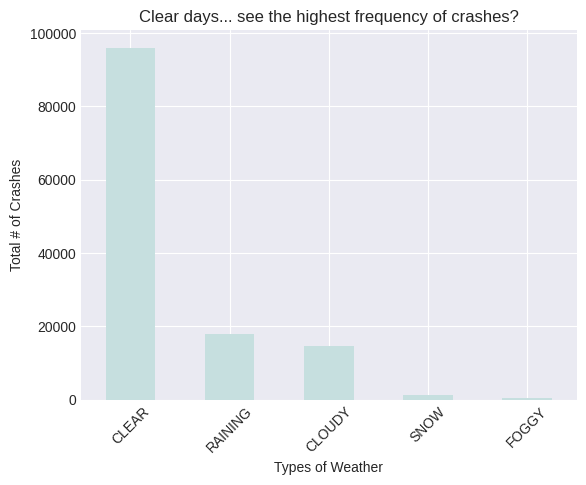

In [258]:
# How was the weather?

cd_w = cd[cd['Weather'].isin(['CLEAR', 'RAINING', 'CLOUDY', 'SNOW', 'FOGGY'])]
cd_w_count = cd_w['Weather'].value_counts()

cd_w_count.plot(kind='bar', color='#c6dfdf')
plt.xlabel('Types of Weather'), plt.ylabel('Total # of Crashes'), plt.title('Clear days... see the highest frequency of crashes?')
plt.xticks(rotation=45)
plt.show()

In [259]:
cd['Driver Distracted By'].value_counts().head(5)

NOT DISTRACTED                    87463
UNKNOWN                           19090
LOOKED BUT DID NOT SEE            16553
INATTENTIVE OR LOST IN THOUGHT     3429
OTHER DISTRACTION                  2539
Name: Driver Distracted By, dtype: int64

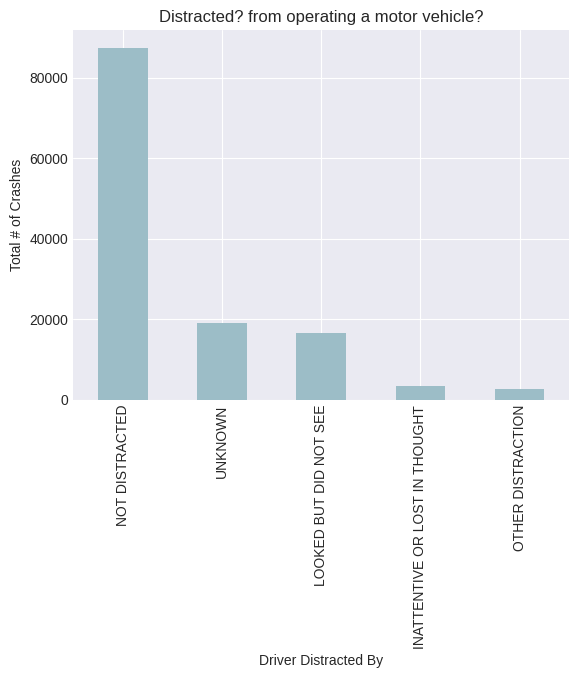

In [260]:
# Plotting the top 'distractions'

distracted = cd['Driver Distracted By'].value_counts().head(5)
distracted.plot(kind='bar', color='#9cbdc7')
plt.xlabel('Driver Distracted By'), plt.ylabel('Total # of Crashes'), plt.title('Distracted? from operating a motor vehicle?')
plt.show()


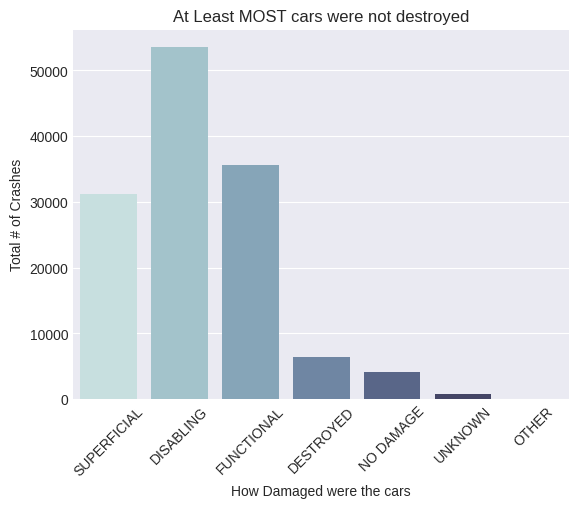

In [261]:
# How damaged was the car?

sns.countplot(x='Vehicle Damage Extent', data=cd, palette= "ch:start=.2,rot=-.3")
plt.xlabel('How Damaged were the cars'), plt.ylabel('Total # of Crashes'), plt.title('At Least MOST cars were not destroyed')
plt.xticks(rotation=45)
plt.show()



In [262]:
cd['Speed Limit'].value_counts()

35    42583
40    28884
30    19731
25    18398
45    10693
50     4016
55     3341
15     1658
0       689
20      665
10      533
5       459
60       62
65       47
70        6
75        1
Name: Speed Limit, dtype: int64

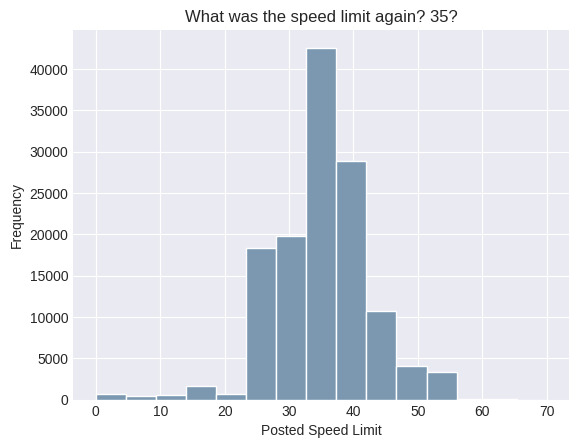

In [263]:
plt.hist(cd['Speed Limit'], bins=15, range=(0, 70), color='#7b98b0', edgecolor='white')
plt.xlabel('Posted Speed Limit'), plt.ylabel('Frequency'), plt.title('What was the speed limit again? 35?')

plt.show()


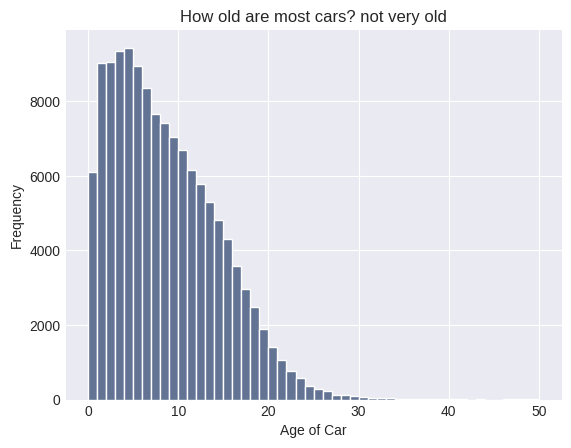

In [264]:
plt.hist(cd['Car Age'], bins=50, range=(0, 50), color='#627393', edgecolor='white')
plt.xlabel('Age of Car'), plt.ylabel('Frequency'), plt.title('How old are most cars? not very old')

plt.show()


In [265]:
# Regression Analysis

# new df to show car ages and number of crashes for each age

count = cd['Car Age'].value_counts()
carage = pd.DataFrame({'Car Age': count.index, 'Total Crashes': count.values})


In [266]:
X = carage[['Car Age']]
y = carage['Total Crashes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 8458687.453248207
R-squared: 0.31503428182320226


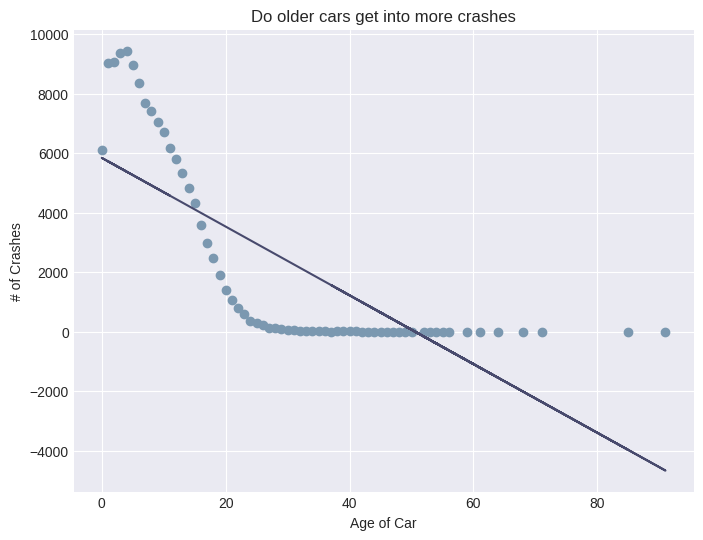

In [269]:

X = carage[['Car Age']]
y = carage['Total Crashes']

fig = plt.figure(figsize=(8, 6), facecolor='#F0F0')
model = LinearRegression()

model.fit(X, y)
predictions = model.predict(X)
plt.plot(X, predictions, color='#484a6d')
plt.scatter(X, y, color='#7b98b0')
plt.xlabel('Age of Car'), plt.ylabel('# of Crashes'), plt.title('Do older cars get into more crashes')


plt.show()


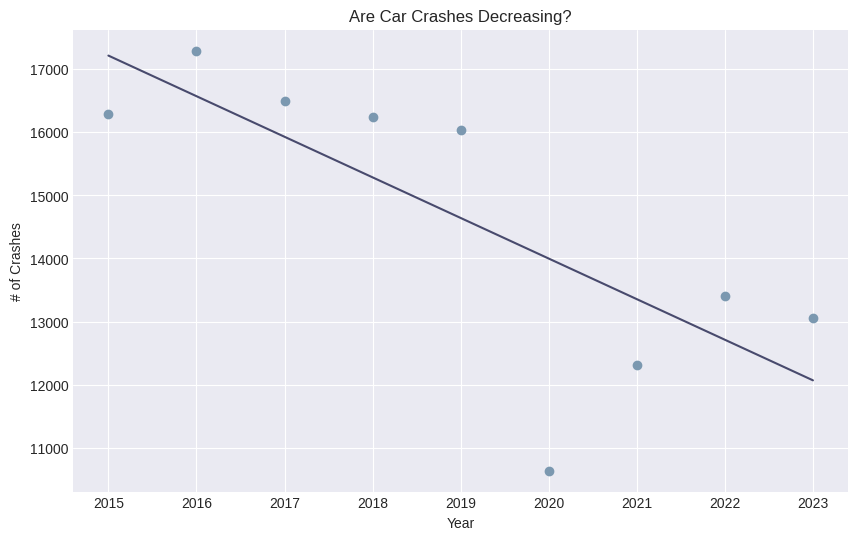

In [268]:

crashes = cd['Year'].value_counts().sort_index()

X = crashes.index.values.reshape(-1, 1)
y = crashes.values.reshape(-1, 1)

fig = plt.figure(figsize=(10, 6), facecolor='#F0F0')
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
plt.plot(X, predictions, color='#484a6d')
plt.scatter(X, y, color='#7b98b0')
plt.xlabel('Year'), plt.ylabel('# of Crashes'), plt.title('Are Car Crashes Decreasing?')


plt.show()
